In this block, we're importing the required libraries for data manipulation (pandas), visualization (matplotlib and seaborn), and handling dates (datetime). Seaborn is used to set a consistent aesthetic style for the plots.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

sns.set_theme(style="whitegrid")

In [43]:
bristol_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-cleaned.csv")
cornwall_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-cleaned.csv")
combined_df = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/housing-cleaned.csv")

This block filters the data to only include rows from the year 2022 and creates a boxplot to visualize the distribution of house prices in Bristol and Cornwall. The plt.ylim() is used to set the y-axis limits to focus on a specific range of house prices.

In [44]:
combined_df['sold_year'] = pd.to_datetime(combined_df['sold_year']).dt.year
housing_2022 = combined_df[combined_df['sold_year'] == 2022]

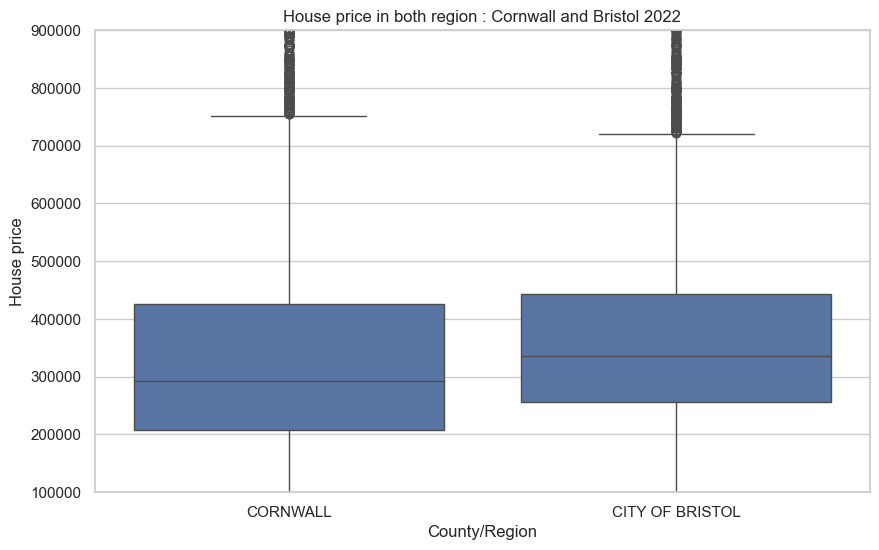

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='county', y='house_sell_price', data=housing_2022)
plt.title('House price in both region : Cornwall and Bristol 2022')
plt.ylim(100000, 900000)
plt.xlabel('County/Region')
plt.ylabel('House price')
plt.show()


This block creates bar charts to show the average house prices in Bristol and Cornwall for different property types in 2022. The property types are recoded for better readability, and the plots are displayed using subplots to show both charts in one figure.

In [46]:
bristol_df['sold_year'] = pd.to_datetime(bristol_df['sold_year']).dt.year
bristol_2022_data = bristol_df[bristol_df['sold_year'] == 2022].copy()

cornwall_df['sold_year'] = pd.to_datetime(cornwall_df['sold_year']).dt.year
cornwall_2022_data = cornwall_df[cornwall_df['sold_year'] == 2022].copy()

house_type_map = {'D': 'Detached house', 'F': 'Flat', 'O': 'Other', 'S': 'Semi-Detached house', 'T': 'Terraced house'}
bristol_2022_data.loc[:, 'house-type'] = bristol_2022_data['house-type'].map(house_type_map)
cornwall_2022_data.loc[:, 'house-type'] = cornwall_2022_data['house-type'].map(house_type_map)

bristol_avg_prices = bristol_2022_data.groupby(['house-type', 'town/city'])['house_sell_price'].mean().reset_index()
bristol_avg_prices['house_sell_price'] = bristol_avg_prices['house_sell_price'].apply(lambda x: round(x))
cornwall_avg_prices = cornwall_2022_data.groupby(['house-type', 'town/city'])['house_sell_price'].mean().reset_index()
cornwall_avg_prices['house_sell_price'] = cornwall_avg_prices['house_sell_price'].apply(lambda x: round(x))

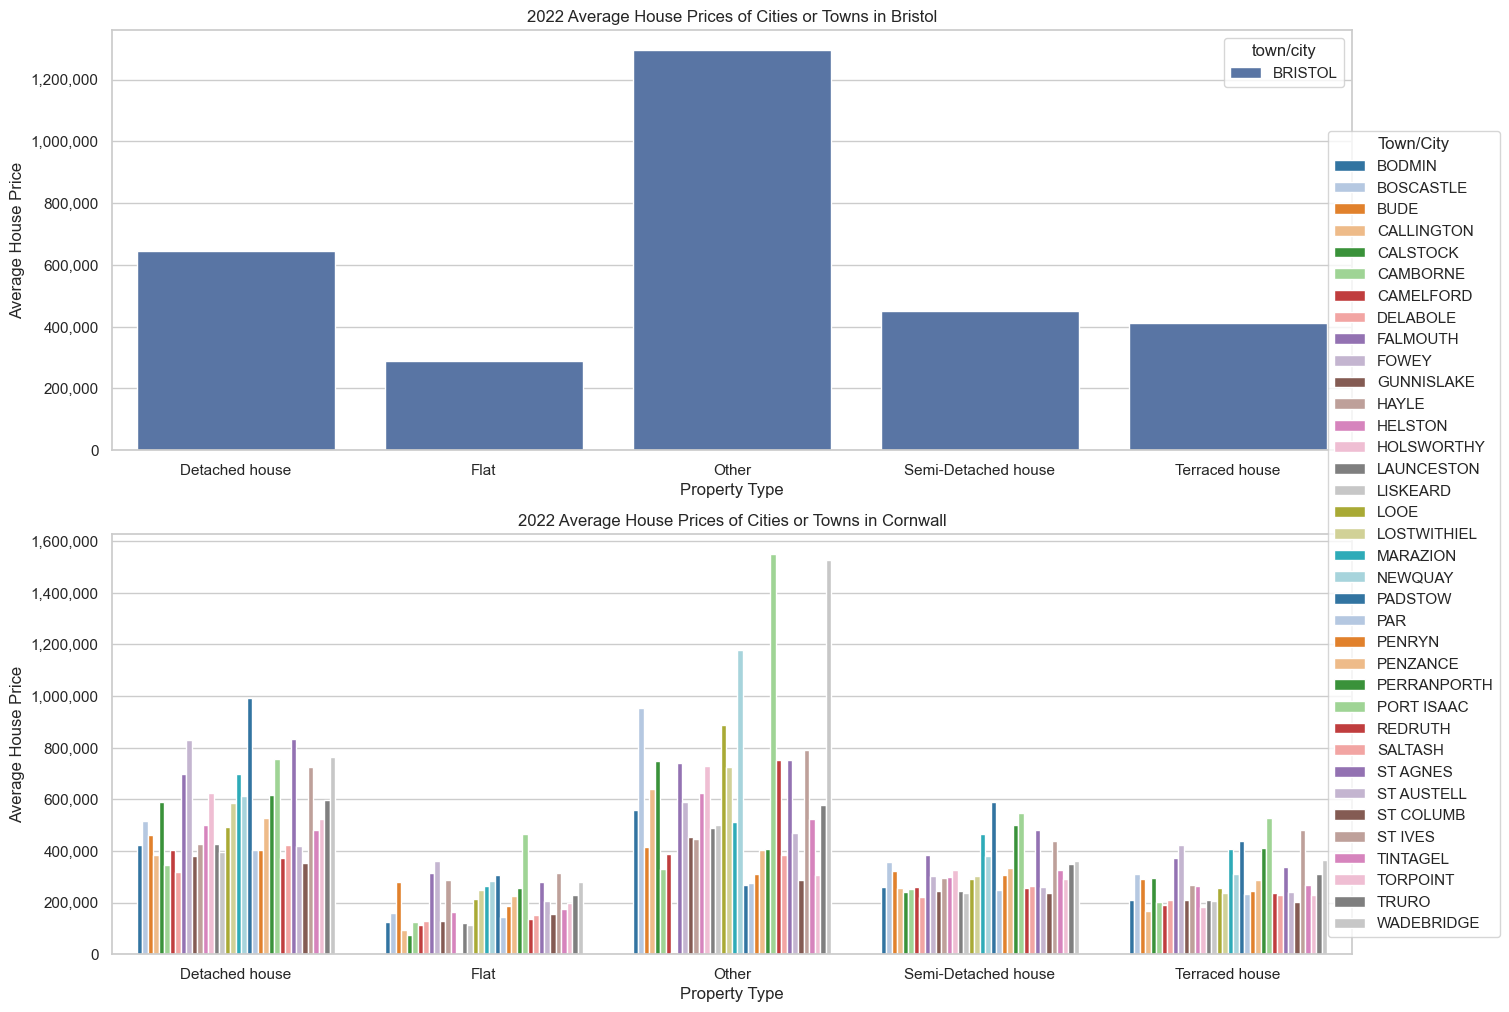

In [47]:
plt.figure(figsize=(16, 12))  

plt.subplot(2, 1, 1)
sns.barplot(x='house-type', y='house_sell_price', hue='town/city', data=bristol_avg_prices, errorbar=None)
plt.title('2022 Average House Prices of Cities or Towns in Bristol')
plt.xlabel('Property Type')
plt.ylabel('Average House Price')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.subplot(2, 1, 2)
sns.barplot(x='house-type', y='house_sell_price', hue='town/city', data=cornwall_avg_prices,dodge=True, palette="tab20", errorbar=None)
plt.title('2022 Average House Prices of Cities or Towns in Cornwall')
plt.xlabel('Property Type')
plt.ylabel('Average House Price')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Town/City', bbox_to_anchor=(1.05, 1), loc='center')
plt.show()

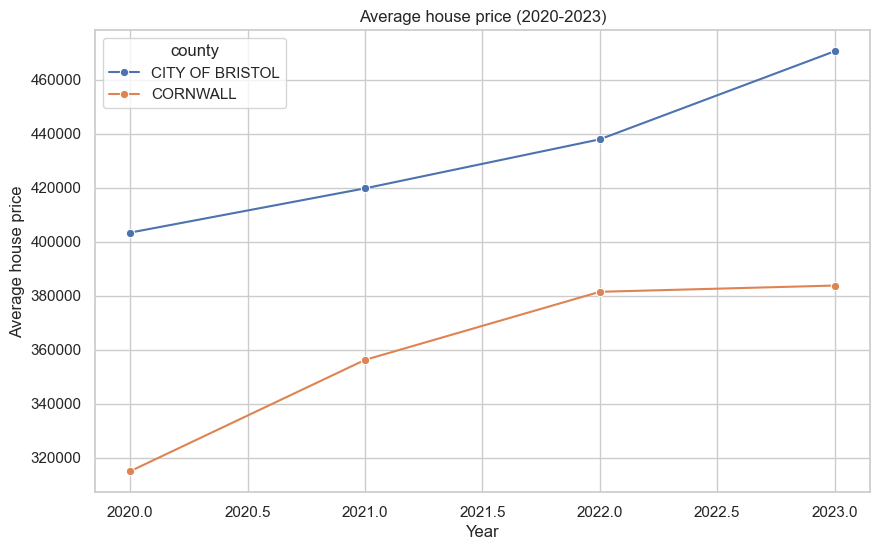

In [48]:
# combined_df['sold_year'] = pd.to_datetime(combined_df['sold_year']).dt.year
house_price_2020_2023 = combined_df[(combined_df['sold_year'] >= 2020) & (combined_df['sold_year'] <= 2023)]

average_price_year = house_price_2020_2023.groupby(['sold_year', 'county'])['house_sell_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='sold_year', y='house_sell_price', hue='county', data=average_price_year, marker='o')
plt.title('Average house price (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average house price')
plt.show()